# 4. Wygenerować wizualizację określającą ilość wypadków z podziałem na dni tygodnia

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
motor_data = pd.read_csv("/Users/agata/Desktop/nypd-motor-vehicle-collisions.csv", low_memory=False, dtype={'third_column': 'str'})

motor_data

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612173,2012-07-21T00:00:00.000,22:46,BROOKLYN,11226,40.651741,-73.965241,"{'type': 'Point', 'coordinates': [-73.9652409,...",PARADE PLACE,CROOKE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,147595,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN
1612174,2012-07-09T00:00:00.000,16:45,NaN,NaN,NaN,NaN,NaN,EDWARD L GRANT HIGHWAY,WEST 169 STREET,NaN,...,Fatigued/Drowsy,Unspecified,NaN,NaN,85220,PASSENGER VEHICLE,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN
1612175,2012-07-09T00:00:00.000,14:35,NaN,NaN,40.791492,-73.935763,"{'type': 'Point', 'coordinates': [-73.935763, ...",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2853431,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1612176,2012-07-18T00:00:00.000,9:20,MANHATTAN,10024,40.779479,-73.973573,"{'type': 'Point', 'coordinates': [-73.9735729,...",CENTRAL PARK WEST,WEST 77 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,52405,SPORT UTILITY / STATION WAGON,VAN,BUS,NaN,NaN


In [3]:
data_df = pd.DataFrame(motor_data, columns = ['ACCIDENT DATE'])
print (data_df)

                   ACCIDENT DATE
0        2019-08-05T00:00:00.000
1        2019-08-27T00:00:00.000
2        2019-08-15T00:00:00.000
3        2019-08-30T00:00:00.000
4        2019-08-06T00:00:00.000
...                          ...
1612173  2012-07-21T00:00:00.000
1612174  2012-07-09T00:00:00.000
1612175  2012-07-09T00:00:00.000
1612176  2012-07-18T00:00:00.000
1612177  2012-07-12T00:00:00.000

[1612178 rows x 1 columns]


In [13]:
data_df['ACCIDENT DATE'] = pd.to_datetime(data_df['ACCIDENT DATE'])
display(data_df)

,ACCIDENT DATE,formatted_date,DAY OF WEEK
0,2019-08-05,05/08/2019 00:00:00,Monday
1,2019-08-27,27/08/2019 00:00:00,Tuesday
2,2019-08-15,15/08/2019 00:00:00,Thursday
3,2019-08-30,30/08/2019 00:00:00,Friday
4,2019-08-06,06/08/2019 00:00:00,Tuesday
...,...,...,...
1612173,2012-07-21,21/07/2012 00:00:00,Saturday
1612174,2012-07-09,09/07/2012 00:00:00,Monday
1612175,2012-07-09,09/07/2012 00:00:00,Monday
1612176,2012-07-18,18/07/2012 00:00:00,Wednesday


In [25]:
data_df['formatted_date'] = data_df['ACCIDENT DATE'].dt.strftime('%d/%m/%Y %H:%M:%S')
print(data_df['formatted_date'])

0          05/08/2019 00:00:00
1          27/08/2019 00:00:00
2          15/08/2019 00:00:00
3          30/08/2019 00:00:00
4          06/08/2019 00:00:00
                  ...         
1612173    21/07/2012 00:00:00
1612174    09/07/2012 00:00:00
1612175    09/07/2012 00:00:00
1612176    18/07/2012 00:00:00
1612177    12/07/2012 00:00:00
Name: formatted_date, Length: 1612178, dtype: object


In [17]:
data_df['DAY OF WEEK'] = data_df['ACCIDENT DATE'].dt.day_name()
display(data_df)

,ACCIDENT DATE,formatted_date,DAY OF WEEK
0,2019-08-05,05/08/2019 00:00:00,Monday
1,2019-08-27,27/08/2019 00:00:00,Tuesday
2,2019-08-15,15/08/2019 00:00:00,Thursday
3,2019-08-30,30/08/2019 00:00:00,Friday
4,2019-08-06,06/08/2019 00:00:00,Tuesday
...,...,...,...
1612173,2012-07-21,21/07/2012 00:00:00,Saturday
1612174,2012-07-09,09/07/2012 00:00:00,Monday
1612175,2012-07-09,09/07/2012 00:00:00,Monday
1612176,2012-07-18,18/07/2012 00:00:00,Wednesday


In [18]:
day_counts = data_df['DAY OF WEEK'].value_counts()
display(day_counts)

DAY OF WEEK
Friday       256236
Thursday     242307
Tuesday      240216
Wednesday    237040
Monday       231946
Saturday     214607
Sunday       189826
Name: count, dtype: int64

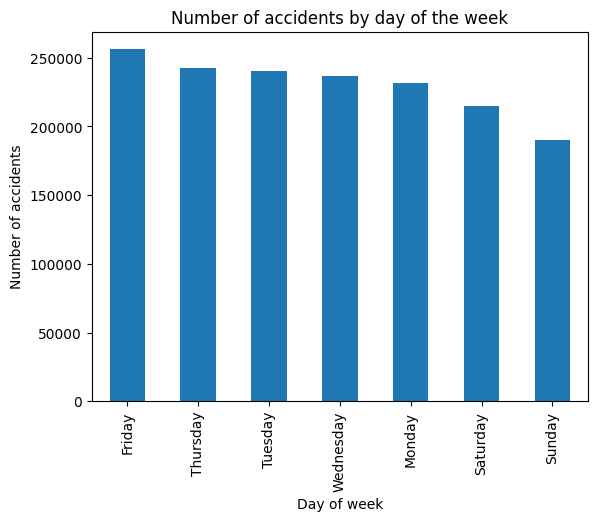

In [24]:
day_counts.plot(kind='bar')
plt.title('Number of accidents by day of the week')
plt.xlabel('Day of week')
plt.ylabel('Number of accidents')

plt.show()